<a href="https://colab.research.google.com/github/chriswilson2020/PyTorchCoLab/blob/main/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

# Setup random seed
RANDOM_SEED = 42

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors. 
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [2]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons
SAMPLES = 1000
SHUFFLE=True
NOISE=0.07
RANDOM_STATE=RANDOM_SEED

X, y = make_moons(n_samples=SAMPLES,
                  shuffle=SHUFFLE,
                  noise=NOISE,
                  random_state=RANDOM_STATE)

In [3]:
# Turn data into a DataFrame
import pandas as pd
moons = pd.DataFrame({"X1": X[:,0],
                      "X2": X[:,1],
                      "label": y})
moons.head(10)

,X1,X2,label
0,-0.033411,0.421391,1
1,0.998827,-0.442890,1
2,0.889592,-0.327843,1
3,0.341958,-0.417690,1
4,-0.838531,0.532375,0
5,0.599064,-0.289773,1
6,0.290090,-0.204688,1
7,-0.038269,0.459429,1
8,1.613771,-0.293970,1
9,0.693337,0.827819,0


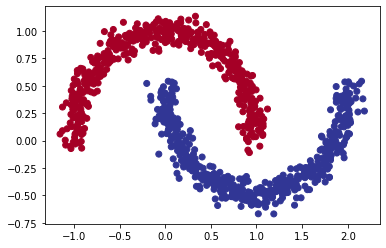

In [4]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [5]:
# Turn data into tensors of dtype float
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

print(f"First five samples of X tensor: {X[:5]}\n")
print(f"First five samples of y tensor {y[:5]}")

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_STATE)

First five samples of X tensor: tensor([[-0.0334,  0.4214],
        [ 0.9988, -0.4429],
        [ 0.8896, -0.3278],
        [ 0.3420, -0.4177],
        [-0.8385,  0.5324]])

First five samples of y tensor tensor([1., 1., 1., 1., 0.])


## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [6]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self, input, output, hidden=8 ):
     super().__init__()

     self.layer_1 = nn.Linear(in_features = input, out_features = hidden)
     self.layer_2 = nn.Linear(in_features=hidden, out_features=hidden)
     self.layer_3 = nn.Linear(in_features=hidden, out_features=output)
     self.relu = nn.ReLU()
    def forward(self, x):
        ## Your code here ##
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

# Instantiate the model
## Your code here ##
model_0 = MoonModelV0(input=2,
        output=1,
        hidden=8).to(device)

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [7]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [8]:
# What's coming out of our model?
model_0.eval()
with torch.inference_mode():
  # logits (raw outputs of model)
  print("Logits:")
  ## Your code here ##
  print(model_0(X_train.to(device)[:10]).squeeze(), "\n")
  # Prediction probabilities
  print("Pred probs:")
  ## Your code here ##
  print(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze()), "\n")
  # Prediction probabilities
  print("Pred labels:")
  ## Your code here ##
  print(torch.round(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze())))


Logits:
tensor([-0.3720, -0.2868, -0.2949, -0.2958, -0.3124, -0.2949, -0.3158, -0.3070,
        -0.3046, -0.2862], device='cuda:0') 

Pred probs:
tensor([0.4080, 0.4288, 0.4268, 0.4266, 0.4225, 0.4268, 0.4217, 0.4239, 0.4244,
        0.4289], device='cuda:0') 

Pred labels:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')


In [9]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
# acc_fn = Accuracy().to(device) # send accuracy function to device
# acc_fn
acc_fn = Accuracy(task='multiclass', num_classes=2).to(device)
acc_fn

MulticlassAccuracy()

In [10]:
## TODO: Uncomment this to set the seed
# torch.manual_seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 10000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
# for epoch in range(epochs):
  ### Training
for epoch in range(epochs):
  model_0.train()


  # 1. Forward pass (logits output)
  y_logits = model_0(X_train).squeeze()

  # Turn logits into prediction probabilities
  y_pred_probs = torch.sigmoid(y_logits)

  # Turn prediction probabilities into prediction labels
  y_pred_labels = torch.round(y_pred_probs)


  # 2. Calculaute the loss
  # loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs
  loss = loss_fn(y_logits, y_train) #Note loss function has builtin sigmoid

  # Calculate the accuracy
  # acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels
  acc = acc_fn(y_pred_labels, y_train.int())

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()  
  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression) 
  optimizer.step()  

  ### Testing
  model_0.eval() 
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
   test_logits = model_0(X_test).squeeze()
  
    # Turn the test logits into prediction labels
   test_pred_labels = torch.round(torch.sigmoid(test_logits))  
 

    # 2. Caculate the test loss/acc
   test_loss = loss_fn(test_logits, y_test)
   test_acc = acc_fn(test_pred_labels, y_test.int())    

  # Print out what's happening every 100 epochs
  # if epoch % 100 == 0:
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} Acc: {acc:.2f} | Test loss: {test_loss:.5f} Test Acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.71394 Acc: 0.50 | Test loss: 0.71220 Test Acc: 0.50
Epoch: 100 | Loss: 0.67962 Acc: 0.64 | Test loss: 0.68031 Test Acc: 0.63
Epoch: 200 | Loss: 0.51619 Acc: 0.83 | Test loss: 0.52136 Test Acc: 0.82
Epoch: 300 | Loss: 0.27524 Acc: 0.88 | Test loss: 0.27803 Test Acc: 0.87
Epoch: 400 | Loss: 0.24062 Acc: 0.88 | Test loss: 0.23509 Test Acc: 0.89
Epoch: 500 | Loss: 0.23333 Acc: 0.88 | Test loss: 0.22501 Test Acc: 0.89
Epoch: 600 | Loss: 0.22820 Acc: 0.88 | Test loss: 0.21865 Test Acc: 0.90
Epoch: 700 | Loss: 0.22370 Acc: 0.88 | Test loss: 0.21308 Test Acc: 0.90
Epoch: 800 | Loss: 0.21992 Acc: 0.88 | Test loss: 0.20885 Test Acc: 0.91
Epoch: 900 | Loss: 0.21696 Acc: 0.89 | Test loss: 0.20541 Test Acc: 0.91
Epoch: 1000 | Loss: 0.21480 Acc: 0.89 | Test loss: 0.20266 Test Acc: 0.91
Epoch: 1100 | Loss: 0.21324 Acc: 0.88 | Test loss: 0.20095 Test Acc: 0.90
Epoch: 1200 | Loss: 0.21190 Acc: 0.88 | Test loss: 0.19928 Test Acc: 0.91
Epoch: 1300 | Loss: 0.20936 Acc: 0.88 | Test loss:

## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [11]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

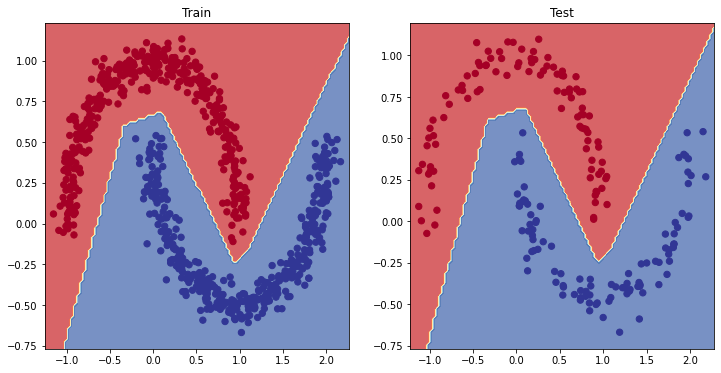

In [12]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [13]:
# Create a straight line tensor
weight = 0.7
bias = 0.3
start = -100
end = 100
step = 2

# create the data as a tensor 
X_linear = torch.arange(start, end, step).unsqueeze(dim=1)
y_linear = weight * X_linear + bias

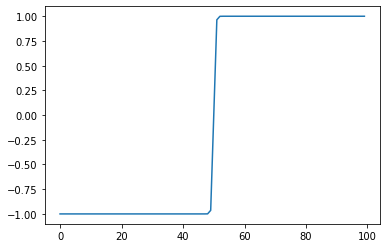

In [14]:
# Test torch.tanh() on the tensor and plot it
plt.plot(torch.tanh(X_linear))

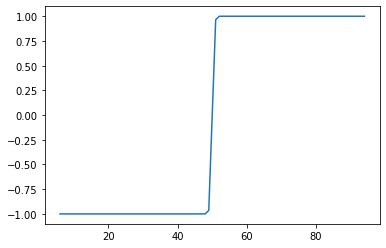

In [15]:
# Replicate torch.tanh() and plot it
def tanh(x):
  #return (1 - torch.exp(-2*x))/(1 + torch.exp(-2*x))
  return (torch.exp(x) - torch.exp(-x))/(torch.exp(x) + torch.exp(-x))

plt.plot(tanh(X_linear))

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

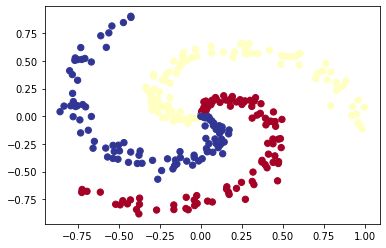

In [29]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [30]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

In [31]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

In [32]:
acc_fn = Accuracy(task='multiclass', num_classes=4).to(device)
acc_fn


MulticlassAccuracy()

In [33]:
# Build the model
class SpiralModelV0(nn.Module):
  def __init__(self, input, output, hidden=10):
    super().__init__()

    self.layer_1 = nn.Linear(in_features = input, out_features = hidden)
    self.layer_2 = nn.Linear(in_features = hidden, out_features = hidden)
    self.layer_3 = nn.Linear(in_features = hidden, out_features = output)
    self.relu = nn.ReLU()
  
  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


# Instantiate model and send it to device
model_1 = SpiralModelV0(input=2,
                        output=3,
                        hidden=10).to(device)

model_1

SpiralModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [34]:
# Setup data to be device agnostic
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
print(X_test.dtype, y_test.dtype, X_train.dtype, y_train.dtype)

model_1.eval()
with torch.inference_mode():


  # Print out first 10 untrained model outputs (forward pass)
  print("Logits:")
  ## Your code here ##
  print(model_1(X_train)[:10])
  
  print("Pred probs:")
  ## Your code here ##
  # https://glassboxmedicine.com/2019/05/26/classification-sigmoid-vs-softmax/
  #print(torch.sigmoid(model_1(X_train)[:10]))
  print(torch.softmax(model_1(X_train)[:10], dim=1))

  print("Pred labels:")
  ## Your code here ##
  #print(torch.round(torch.sigmoid(model_1(X_train)[:10])))
  print(torch.softmax(model_1(X_train)[:10], dim=1).argmax(dim=1))

torch.float32 torch.int64 torch.float32 torch.int64
Logits:
tensor([[ 2.7922e-01, -4.1833e-04,  3.9369e-01],
        [ 2.3457e-01,  5.1637e-02,  3.3974e-01],
        [ 3.2527e-01, -3.5720e-02,  4.0775e-01],
        [ 2.7211e-01,  5.1948e-02,  3.3092e-01],
        [ 3.3806e-01, -1.7030e-02,  3.7268e-01],
        [ 3.1584e-01, -1.2659e-02,  3.6838e-01],
        [ 3.2440e-01, -2.5109e-02,  3.8565e-01],
        [ 3.4019e-01, -6.6376e-02,  4.8206e-01],
        [ 2.5359e-01,  5.0053e-02,  3.2227e-01],
        [ 2.7240e-01,  5.2172e-02,  3.3110e-01]], device='cuda:0')
Pred probs:
tensor([[0.3475, 0.2628, 0.3897],
        [0.3397, 0.2829, 0.3774],
        [0.3593, 0.2504, 0.3902],
        [0.3493, 0.2803, 0.3704],
        [0.3655, 0.2562, 0.3783],
        [0.3605, 0.2596, 0.3799],
        [0.3612, 0.2547, 0.3841],
        [0.3548, 0.2363, 0.4089],
        [0.3464, 0.2826, 0.3710],
        [0.3493, 0.2803, 0.3704]], device='cuda:0')
Pred labels:
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cu

In [37]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.02)

In [38]:

# Build a training loop for the model
epochs = 50000

# Loop over data
for epoch in range(epochs):
  ## Training
  model_1.train()
  # 1. forward pass
  y_logits = model_1(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_pred, y_train)
  
  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backwards
  loss.backward()

  # 5. optimizer step step step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, test_pred)
    test_acc = acc_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} Acc: {acc:.2f} | Test loss: {test_loss:.4f} Test acc: {test_acc:.2f}")
  

Epoch: 0 | Loss: 0.3200 Acc: 0.84 | Test loss: 0.2588 Test acc: 0.83
Epoch: 100 | Loss: 0.3082 Acc: 0.84 | Test loss: 0.2512 Test acc: 0.87
Epoch: 200 | Loss: 0.2966 Acc: 0.85 | Test loss: 0.2440 Test acc: 0.87
Epoch: 300 | Loss: 0.2856 Acc: 0.87 | Test loss: 0.2375 Test acc: 0.87
Epoch: 400 | Loss: 0.2747 Acc: 0.87 | Test loss: 0.2308 Test acc: 0.90
Epoch: 500 | Loss: 0.2648 Acc: 0.90 | Test loss: 0.2240 Test acc: 0.90
Epoch: 600 | Loss: 0.2555 Acc: 0.91 | Test loss: 0.2171 Test acc: 0.93
Epoch: 700 | Loss: 0.2466 Acc: 0.91 | Test loss: 0.2103 Test acc: 0.93
Epoch: 800 | Loss: 0.2378 Acc: 0.92 | Test loss: 0.2041 Test acc: 0.93
Epoch: 900 | Loss: 0.2295 Acc: 0.93 | Test loss: 0.1976 Test acc: 0.93
Epoch: 1000 | Loss: 0.2220 Acc: 0.94 | Test loss: 0.1907 Test acc: 0.95
Epoch: 1100 | Loss: 0.2149 Acc: 0.94 | Test loss: 0.1837 Test acc: 0.97
Epoch: 1200 | Loss: 0.2084 Acc: 0.94 | Test loss: 0.1771 Test acc: 0.97
Epoch: 1300 | Loss: 0.2023 Acc: 0.94 | Test loss: 0.1709 Test acc: 0.97
Epoc

In [39]:
# Plot decision boundaries for training and test sets
# Plot the model predictions
# TK - this could go in the helper_functions.py and be explained there
def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

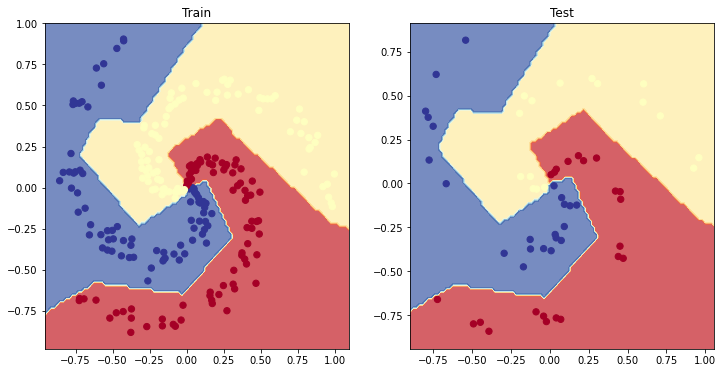

In [40]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)